In [1]:
import mlflow
from mlflow.tracking import MlflowClient

print(f"tracking URI: '{mlflow.get_tracking_uri()}'")

client = MlflowClient()

# Use the search_experiments function to get a list of available experiments
experiments = client.search_experiments()
print(len(experiments))

# Display the list of available experiments
for experiment in experiments:
    print(f"Experiment Name: {experiment.name}, Experiment ID: {experiment.experiment_id}")

tracking URI: 'file:///Users/mohammedzaidsyed/Desktop/Diamond/MLOPS_Diamond/mlruns'
1
Experiment Name: Default, Experiment ID: 0


In [2]:
import pandas as pd
def load_data(path):
    return pd.read_csv(path)

df = load_data('Data/diamonds.csv')
df.head()

,carat,cut,color,clarity,depth,table,price,'x','y','z'
0,0.23,b'Ideal',b'E',b'SI2',61.5,55.0,326.0,3.95,3.98,2.43
1,0.21,b'Premium',b'E',b'SI1',59.8,61.0,326.0,3.89,3.84,2.31
2,0.23,b'Good',b'E',b'VS1',56.9,65.0,327.0,4.05,4.07,2.31
3,0.29,b'Premium',b'I',b'VS2',62.4,58.0,334.0,4.20,4.23,2.63
4,0.31,b'Good',b'J',b'SI2',63.3,58.0,335.0,4.34,4.35,2.75


In [3]:
df.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', ''x'',
       ''y'', ''z''],
      dtype='object')

In [4]:
df.shape

(53940, 10)

In [5]:
df.nunique()

carat        273
cut            5
color          7
clarity        8
depth        184
table        127
price      11602
'x'          554
'y'          552
'z'          375
dtype: int64

In [6]:
df.describe()

,carat,depth,table,price,'x','y','z'
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  float64
 7   'x'      53940 non-null  float64
 8   'y'      53940 non-null  float64
 9   'z'      53940 non-null  float64
dtypes: float64(7), object(3)
memory usage: 4.1+ MB


Visualization

/Users/mohammedzaidsyed/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 1500x1000 with 0 Axes>

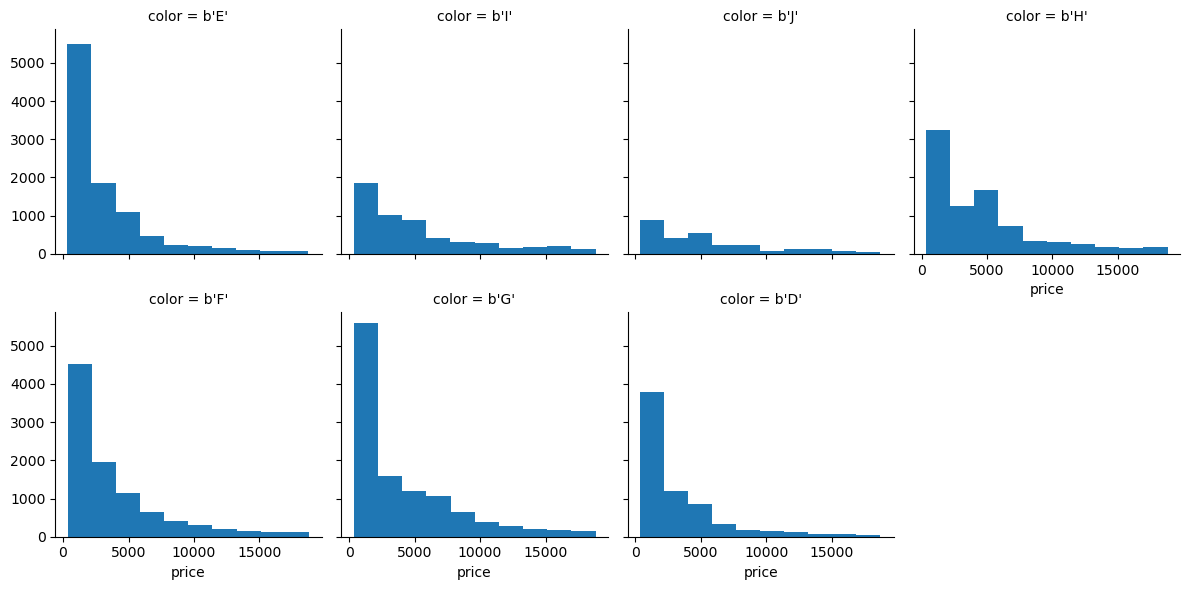

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15, 10))
graph = sns.FacetGrid(df, col = 'color', col_wrap = 4)
graph.map(plt.hist, 'price', bins = 10)


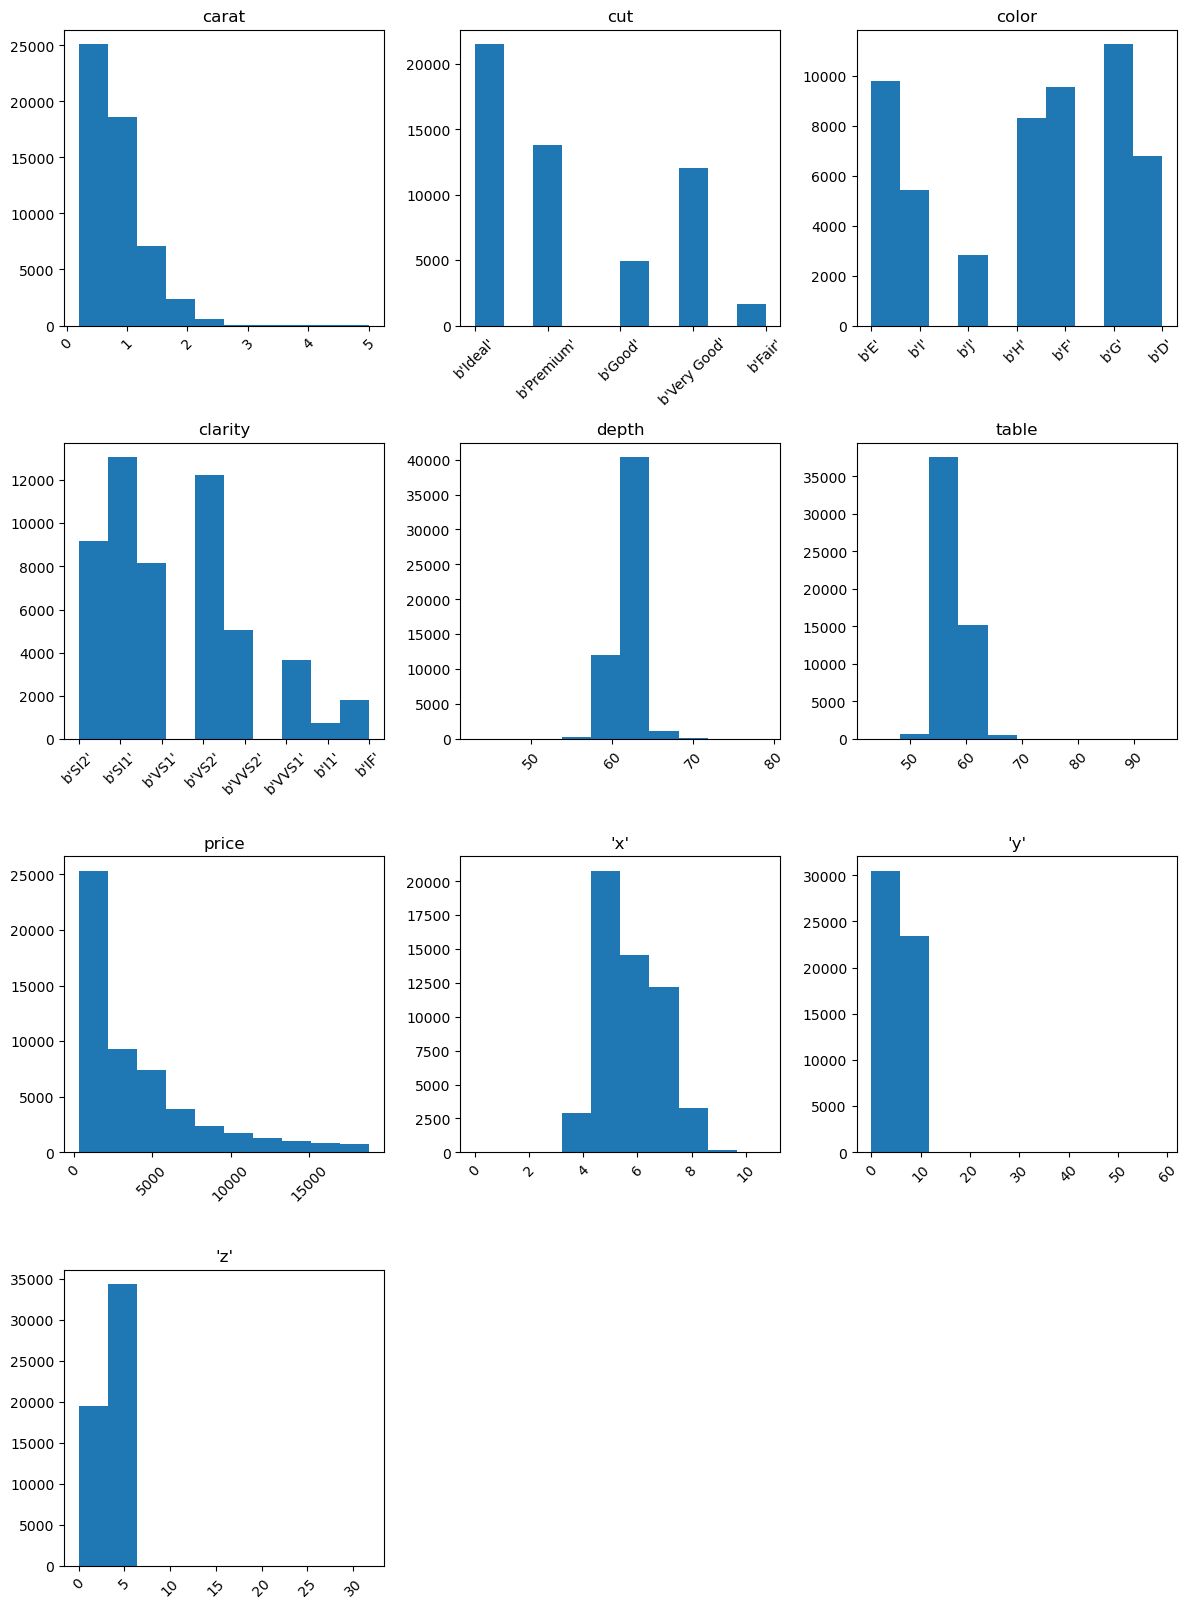

In [9]:
lista_colunas = list(df.columns)
plt.figure(figsize = (12,20))
for i in range(len(lista_colunas)):
    plt.subplot(5, 3, i + 1)
    plt.title(lista_colunas[i])
    plt.xticks(rotation = 45)
    plt.hist(df[lista_colunas[i]])
    
plt.tight_layout()